In this notebook, I'll be exploring the data related to ethnicity, categorizing them, summarizing findings and saving the final results into csv files.

In [40]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data:
NS_ethnicity = pd.read_csv('original_ethnicity_data.csv')

In [3]:
NS_ethnicity.describe(include = 'all')

,participant_ID,ethnicity_Indigenous,ethnicity_White/European,ethnicity_Black_African_Caribbean,ethnicity_Southeast_Asian,ethnicity_East_Asian,ethnicity_South_Asian,ethnicity_Middle_Eastern,ethnicity_Latin_American,ethnicity_do_not_know,ethnicity_prefer_not_to_answer,ethnicity_other
count,4054,517,1612,910,86,98,73,511,142,38,164,71
unique,4054,3,2,1,1,1,1,1,1,1,1,48
top,ns 757,indigenous (inuit/first nations/metis),white/ european,"black/african/caribbean (african, afro-caribbe...","south east asian (filipino, vietnamese, cambod...","east asian (chinese, korean, japanese, taiwane...","south asian (e.g. east indian, pakistani, sri ...","middle eastern (arab, persian, west asian desc...","latin american (latin american, hispanic descent)",i don't know,prefer not to answer,north african
freq,1,502,1563,910,86,98,73,511,142,38,164,11


We can see that there are multiple values in a column, let's check them out:

In [4]:
NS_ethnicity.ethnicity_Indigenous.value_counts()

ethnicity_Indigenous
indigenous (inuit/first nations/metis)     502
indigenous (inuit/first nations/mã©tis)     14
indigenous (inuit/first nations/métis)       1
Name: count, dtype: int64

In [5]:
# let's find the indecies to unify the values:
to_fix = NS_ethnicity[(NS_ethnicity.ethnicity_Indigenous.str.startswith('indigenous') == True)]

In [6]:
# now, we'll replace the values:
NS_ethnicity.ethnicity_Indigenous.iloc[to_fix.index] = 'indigenous (inuit/first nations/metis)'

In [7]:
# check our work
NS_ethnicity.ethnicity_Indigenous.value_counts()

ethnicity_Indigenous
indigenous (inuit/first nations/metis)    517
Name: count, dtype: int64

In [8]:
# We also have the same problem with the White/ European column, let's check it out:
NS_ethnicity.iloc[:, 2].unique()

array(['white/ european', nan, 'white/european'], dtype=object)

In [9]:
# again find the indecies for the values:
white = NS_ethnicity[NS_ethnicity['ethnicity_White/European'].isna() == False]

In [10]:
# Now replace the values:
NS_ethnicity.loc[white.index, 'ethnicity_White/European'] = 'white/ european'

In [11]:
# Check our work
NS_ethnicity['ethnicity_White/European'].value_counts()

ethnicity_White/European
white/ european    1612
Name: count, dtype: int64

In [12]:
# let's check the ethnicity_other values:
NS_ethnicity.ethnicity_other.unique()

array([nan, 'irish canadian', 'r.d.c', 'african', 'canadian',
       'north african', 'lebanese', 'mixed- canadian', 'west africa',
       'russian', 'nigeria africa', 'french canadian',
       'indigenous and white /european', 'ethiopian', 'scottish',
       'irish-slavic', 'newfoundland mom and father from there',
       'ukraine', 'kurdish', 'i am greek', 'inuk eskimo white scottish',
       'white', 'friends canadian', 'german', 'mixed', 'yugoslavian',
       'egyptien  canadian', 'ok', 'mixed race', 'somali', 'turkish food',
       'iâ€™m jewish-romanian and irish but i was born and raised in canada',
       'metis and chinese mix background', 'irish and american',
       'north african/ moroccans', 'jewish', 'central asia', 'iranian',
       'maghrebian', 'algerian', 'i am a living being.', 'algerian arab',
       'arab', 'amazigh', 'white north african', 'north africa',
       'maghrebian (north african)', 'moroccan', 'pakistani'],
      dtype=object)

I'll create a function to map the answers in others column to available options, but first I will create a column for "central asia":

In [13]:
NS_ethnicity['ethnicity_central_asian'] = None

In [14]:
# Define the mapping function
def map_answers_to_options(answers):
    
    options = {
        "indigenous (inuit/first nations/metis)": ["inuit", "first nations", "metis", "inuk","indigenous"],
        "white/ european": ["white", "european", "irish", "scottish", "german", "russian", "ukraine", "yugoslavian", "slavic", "newfoundland", "french", "greek"],
        "black/african/caribbean (african, afro-caribbean, african-canadian descent)": ["black", "caribbean", "afri", "afro","r.d.","nigeria", "egypt", "ethiopia", "amazigh","somali", "maghreb", "moroccan","algerian", "north african"],
        "south east asian (filipino, vietnamese, cambodian, thai, other southeast asian descent)": ["filipino", "vietnamese", "cambodian", "thai", "southeast asian"],
        "east asian (chinese, korean, japanese, taiwanese descent)": ["chinese", "korean", "japanese", "taiwanese"],
        "south asian (e.g. east indian, pakistani, sri lankan, indo-caribbean, etc)": ["east indian", "pakistani", "sri lankan", "indo-caribbean"],
        "central asian": ["central asia"],        
        "middle eastern (arab, persian, west asian descent, e.g. afghan, egyptian, iranian, etc)": ["arab", "persia", "west asian", "afghan", "egypt", "algeria","iran", "kurd", "lebanese", "maghreb", "turkish", "amazigh", "north africa", "moroccan"],
        "latin american (latin american, hispanic descent)": ["latin american", "hispanic"],
        "i don't know": ["i don't know", "canadian"],
        "prefer not to answer": ["prefer not to answer","jewish",  "ok", "living being", "mixed"]
    }

    def find_options(answer):
        if isinstance(answer, str):
            answer_lower = answer.lower()
            matched_options = []
            for option, keywords in options.items():
                if any(keyword in answer_lower for keyword in keywords):
                    if option not in matched_options:
                        matched_options.append(option)
            if len(matched_options) > 1:
                if 'prefer not to answer' in matched_options:
                    matched_options.remove('prefer not to answer')
                elif  "i don't know" in matched_options:
                    matched_options.remove("i don't know")
                
            return ';'.join(matched_options) if matched_options else "other"
        return answer


    mapped_answers = [find_options(answer) for answer in answers]

    return mapped_answers

In [15]:
# apply the mapping function to the "ethnicity_other" column:
NS_ethnicity['mapped_ethnicity'] = NS_ethnicity['ethnicity_other'].apply(lambda x: list(map_answers_to_options([x]))[0])

In [16]:
# let's drop the ethnicity_other column now:
NS_ethnicity.drop('ethnicity_other', axis = 1, inplace = True)

In [17]:
# create a function to consolidate the data:
def consolidate_row(row):
    """ 
    Consolidate answers from a DataFrame row, excluding the first and last columns.

    This function processes a row from a DataFrame to:
    1. Create a list of consolidated answers from specified columns, excluding the "participant_ID" (first column) and the last column.
       - Only non-null and non-empty values are included in the list.
    2. Count the number of answers provided.
    3. If the consolidated list contains "prefer not to answer", the list is updated to contain only this value.
    4. Return the consolidated answers as a single string and the count of answers.

    Parameters:
    row (pd.Series): A row from a DataFrame containing answers to be consolidated.

    Returns:
    tuple: A tuple containing:
           - A string of consolidated answers, joined by '; '.
           - An integer count of the number of answers provided.
    """
        
    consolidated = []
    
    # Loop through the specified columns excluding the "participant_ID":
    for value in row.iloc[1:]:
        if pd.notna(value)  and value != '':
            values = value.split(';') 
            for value in values:
                if value not in consolidated:
                    consolidated.append(value)
        
    
    consolidated_answer = ';'.join(consolidated)
    
    # finding out how many answers were provided:
    number_of_answers = len(consolidated_answer.split(';'))
    
    # ensuring we don't get any '' in the final result:
    if consolidated_answer == '':
        consolidated_answer = 'prefer not to answer'
        number_of_answers = 0
        
    # updating the records for "i don't know":
    if "i don't know" in consolidated:
        consolidated_answer = "i don't know"
        
    # updating the records for "prefer not to answer":
    if 'prefer not to answer' in consolidated:
        consolidated_answer = 'prefer not to answer'
    
    # updating questionable answers:
    if number_of_answers > 5:
        consolidated_answer = 'prefer not to answer'
        
    
    return consolidated_answer , number_of_answers

In [18]:
# Apply the consolidate_row function to each row and create new columns:
NS_ethnicity[['ethnicity_consolidated', 'ethnicity_number_of_answers']] = NS_ethnicity.apply(
        lambda row: pd.Series(consolidate_row(row)), axis=1 )

In [19]:
# ensuring the mapped_ethnicity column is correctly handled:
mapped_ethnicity = NS_ethnicity[NS_ethnicity.mapped_ethnicity.isna() == False]

for x in mapped_ethnicity.index:
    if NS_ethnicity.mapped_ethnicity.iloc[x] not in NS_ethnicity.ethnicity_consolidated.iloc[x]:
        ethnicities = NS_ethnicity.mapped_ethnicity.iloc[x].split(';')
        all_ethnicities = NS_ethnicity.ethnicity_consolidated.iloc[x]
        for ethnicity in ethnicities:
            if ethnicity not in all_ethnicities:
                print(f'The mapped ethnicity at index {x} is not correctly handled')

print('Completed checking if all mapped ethnicities are in the consolidated ethnicity column')

Completed checking if all mapped ethnicities are in the consolidated ethnicity column


In [20]:
# Since all the values in the "mapped_ethnicity" were correctly handled, I'll be dropping the column:
NS_ethnicity.drop('mapped_ethnicity', axis = 1, inplace = True)

In [21]:
NS_ethnicity.columns[1:-3]

Index(['ethnicity_Indigenous', 'ethnicity_White/European',
       'ethnicity_Black_African_Caribbean', 'ethnicity_Southeast_Asian',
       'ethnicity_East_Asian', 'ethnicity_South_Asian',
       'ethnicity_Middle_Eastern', 'ethnicity_Latin_American',
       'ethnicity_do_not_know', 'ethnicity_prefer_not_to_answer'],
      dtype='object')

In [22]:
# first, I'll set all values in the desired columns to 0
NS_ethnicity.iloc[:, 1:-2] = 0

In [23]:
# overview:
NS_ethnicity.head(1)

,participant_ID,ethnicity_Indigenous,ethnicity_White/European,ethnicity_Black_African_Caribbean,ethnicity_Southeast_Asian,ethnicity_East_Asian,ethnicity_South_Asian,ethnicity_Middle_Eastern,ethnicity_Latin_American,ethnicity_do_not_know,ethnicity_prefer_not_to_answer,ethnicity_central_asian,ethnicity_consolidated,ethnicity_number_of_answers
0,ns 757,0,0,0,0,0,0,0,0,0,0,0,white/ european,1


In [24]:
# Now, I am going to replace the values in each column: 1 is indicated in the column that matches any of the consoldiated value:
for x in NS_ethnicity.index:
    values = NS_ethnicity.ethnicity_consolidated.iloc[x].split(';')
    
    dictionary_words = {'indigenous': NS_ethnicity.columns[1],
                     'white' : NS_ethnicity.columns[2],
                     'african' : NS_ethnicity.columns[3],
                     'southeast asian' : NS_ethnicity.columns[4],
                     'east asian' : NS_ethnicity.columns[5],
                     'south asian' : NS_ethnicity.columns[6],
                     'middle': NS_ethnicity.columns[7],
                     'latin': NS_ethnicity.columns[8],
                     "i don't know": NS_ethnicity.columns[9],
                     'prefer': NS_ethnicity.columns[10],
                     'central asia': NS_ethnicity.columns[11]}

    
    if 'prefer not to answer' in values:
        NS_ethnicity.iloc[x, 10] = 1
    
    elif "i don't know" in values:
        NS_ethnicity.iloc[x, 9] = 1
            
    else:
        for value in values:
            for key in dictionary_words.keys():
                if key in value:
                    column = dictionary_words[key]
                    NS_ethnicity.loc[x, [column]] = 1

In [39]:
NS_ethnicity.describe(include = 'all')

,participant_ID,ethnicity_Indigenous,ethnicity_White/European,ethnicity_Black_African_Caribbean,ethnicity_Southeast_Asian,ethnicity_East_Asian,ethnicity_South_Asian,ethnicity_Middle_Eastern,ethnicity_Latin_American,ethnicity_do_not_know,ethnicity_prefer_not_to_answer,ethnicity_central_asian,ethnicity_consolidated,ethnicity_number_of_answers,ethnicity_bin
count,4054,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054,4054.000000,4054
unique,4054,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,40,NaN,5
top,ns 757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,white/ european,NaN,1
freq,1,3541.0,2435.0,3126.0,3973.0,3883.0,3985.0,3523.0,3919.0,4012.0,3814.0,4052.0,1495,NaN,3583
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.045141,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375259,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [26]:
# I will create a summary where backgrounds are in bins:
bins = {
    'prefer not to answer': NS_ethnicity.ethnicity_consolidated == 'prefer not to answer',
    "i don't know" : NS_ethnicity.ethnicity_do_not_know == 1,
    '1': (NS_ethnicity.ethnicity_number_of_answers == 1),
    '2': NS_ethnicity.ethnicity_number_of_answers == 2,
    '3+': NS_ethnicity.ethnicity_number_of_answers >= 3,
    }

In [27]:
# Create a new column in the DataFrame
NS_ethnicity['ethnicity_bin'] = np.select(list(bins.values()),list(bins.keys()), default='unknown')

In [28]:
# save the dataframe as a csv file.
NS_ethnicity.to_csv('NS_ethnicity_mapped_consolidated_binned.csv', index = False)

I will create a couple of dataframes with a summary of the data above:

In [29]:
# create a quick summary:
overall_summary = NS_ethnicity.iloc[:, -2:].groupby('ethnicity_bin').count().sort_values(by = 'ethnicity_number_of_answers', ascending = False)

In [30]:
# view results:
overall_summary

,ethnicity_number_of_answers
ethnicity_bin,
1,3583
prefer not to answer,240
2,180
i don't know,42
3+,9


In [31]:
overall_summary.columns = ['total']

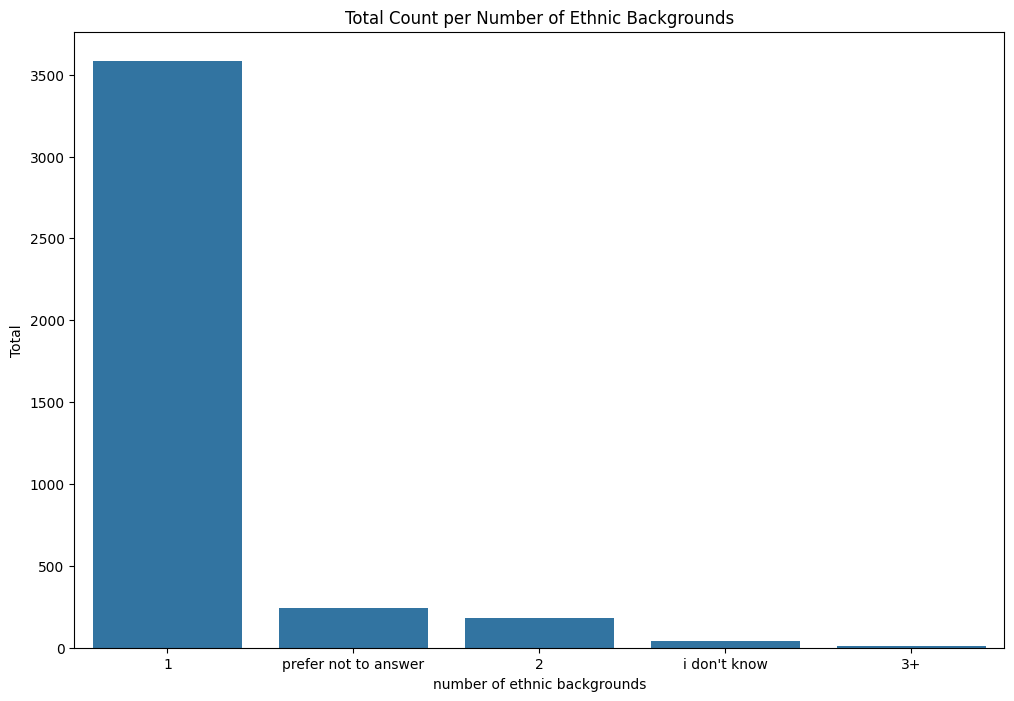

In [32]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data= overall_summary,
    x='ethnicity_bin',
    y='total',
    errorbar=None
)


plt.xlabel('number of ethnic backgrounds')
plt.ylabel('Total')
plt.title('Total Count per Number of Ethnic Backgrounds')

# Save the figure
plt.savefig('ethnicity_number_of_backgrounds.png', dpi=300, bbox_inches='tight')

# show figure
plt.show()

In [33]:
# save the above summary into a csv file:
overall_summary.to_csv('ethnicity_binned.csv')

In [34]:
summary = {}
for column in NS_ethnicity.columns[1:-3]:
    ethnicity = column.split('_')
    ethnicity = ' '.join(ethnicity[1:])
    summary.update({ethnicity: NS_ethnicity[column].sum(axis = 0)})

In [35]:
# create a dataframe from the above summary dictionary:
ethnicity_summary = pd.DataFrame({'ethnicity' : summary.keys(),
             'total' : summary.values()})

In [36]:
ethnicity_summary = ethnicity_summary.sort_values(by = 'total', ascending = False)

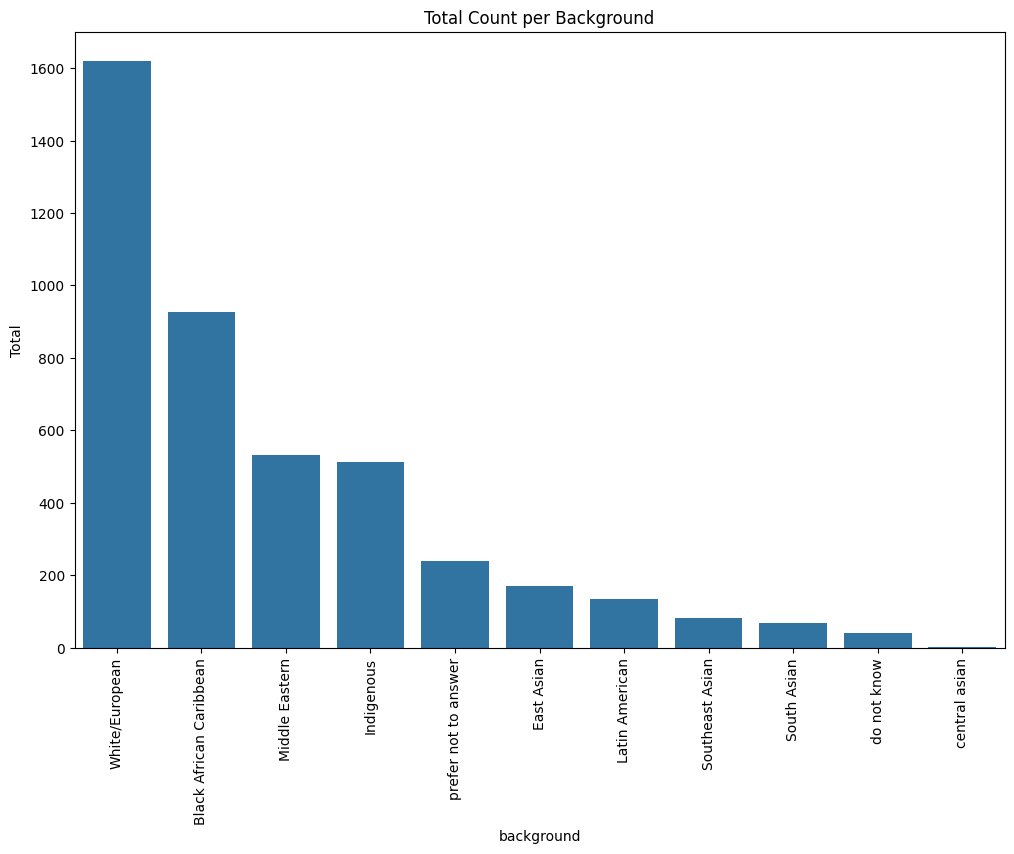

In [37]:
# plot the graph
plt.figure(figsize=(12, 8))
sns.barplot(
    data= ethnicity_summary,
    x='ethnicity',
    y='total',
    errorbar=None
)

plt.xticks(rotation= 90)
plt.xlabel('background')
plt.ylabel('Total')
plt.title('Total Count per Background')

# Save the figure
plt.savefig('ethnicity_total_backgrounds.png', dpi=300, bbox_inches='tight')

# show figure
plt.show()

In [38]:
# save the summary dataframe:
ethnicity_summary.to_csv('ethnic_summary.csv', index = False)